## Figure3-6 The comparison of total annualised costs of mechanical emptying and transporting between public utility (NARWASSCO) and private operator (Wambugu). a) and b) shows the proportion for each major category. The detailed comparison at the sub category are presented at Direct CapEx (c), Indirect CapEx (d), Direct OpEx (e) and Indirect OpEx (f).

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [194]:
# variables
path_excel = r'data.xlsx'
sheetname = r'fsm_E&T'

hatches = ['///', '...', '+++', 'oo']

plt.rcParams['font.size'] = 14

dpi = 700
file_path = r'fig3-6_fsm_e&t_cost.png'

In [195]:
# x軸の目盛りを設定する
def thousand_formatter(x, pos):
    return '{:,.0f}'.format(x / 1000)

In [196]:
def createPiechart(ax, title, group_col, value_col):
    wedges, labels, _ = ax.pie(
        df[value_col], 
        colors='w',
        autopct='%.0f%%', 
        pctdistance=1.1, 
        startangle=90, 
        counterclock=False,
        wedgeprops={'linewidth': 1, 'edgecolor':"k"},
        textprops={'fontsize': 16})

    for i, wedge in enumerate(wedges):
        wedge.set_hatch(hatches[i % len(hatches)])

    ax.set_title(title, loc='center', x=0.5, y=1.0, fontsize=16)
#     ax.legend(wedges, df[group_col], title=group_col, loc='lower center', bbox_to_anchor=(0.5, -0.2), prop={"size":12})

In [250]:
def createComparedBarchart(ax, sheet_name, x_col_1, x_col_2, y_col, title, x_label):
    df = pd.read_excel(path_excel, sheet_name=sheet_name)

    width = 0.35

    ax.barh(df[y_col].index, df[x_col_1], height=width, label=x_col_1, color='w', edgecolor='k', hatch=None)
    ax.barh(df[y_col].index + width, df[x_col_2], height=width, label=x_col_2, color='w', edgecolor='k', hatch='//')

    ax.invert_yaxis()
    ax.set_yticks(df[y_col].index + width / 2)
    ax.set_yticklabels(df[y_col])

    ax.xaxis.set_major_formatter(FuncFormatter(thousand_formatter))
    ax.xaxis.grid(True)

    ax.set_xlabel(x_label)
    ax.set_title(title)

    for i, v in enumerate(df[x_col_1]):
        ax.text(v + 700, i, '{:,.0f}'.format(v / 1000), color='k', va='center', fontsize=14)

    for i, v in enumerate(df[x_col_2]):
        if (df[y_col][i] == 'Consumables'):
            ax.text(v + 700, i + width * 2.5, '{:,.0f}'.format(v / 1000), color='k', va='center', fontsize=14, ha='right')
        else:
            ax.text(v + 700, i + width, '{:,.0f}'.format(v / 1000), color='k', va='center', fontsize=14)

    ax.legend(loc='lower right', prop={"size":16})

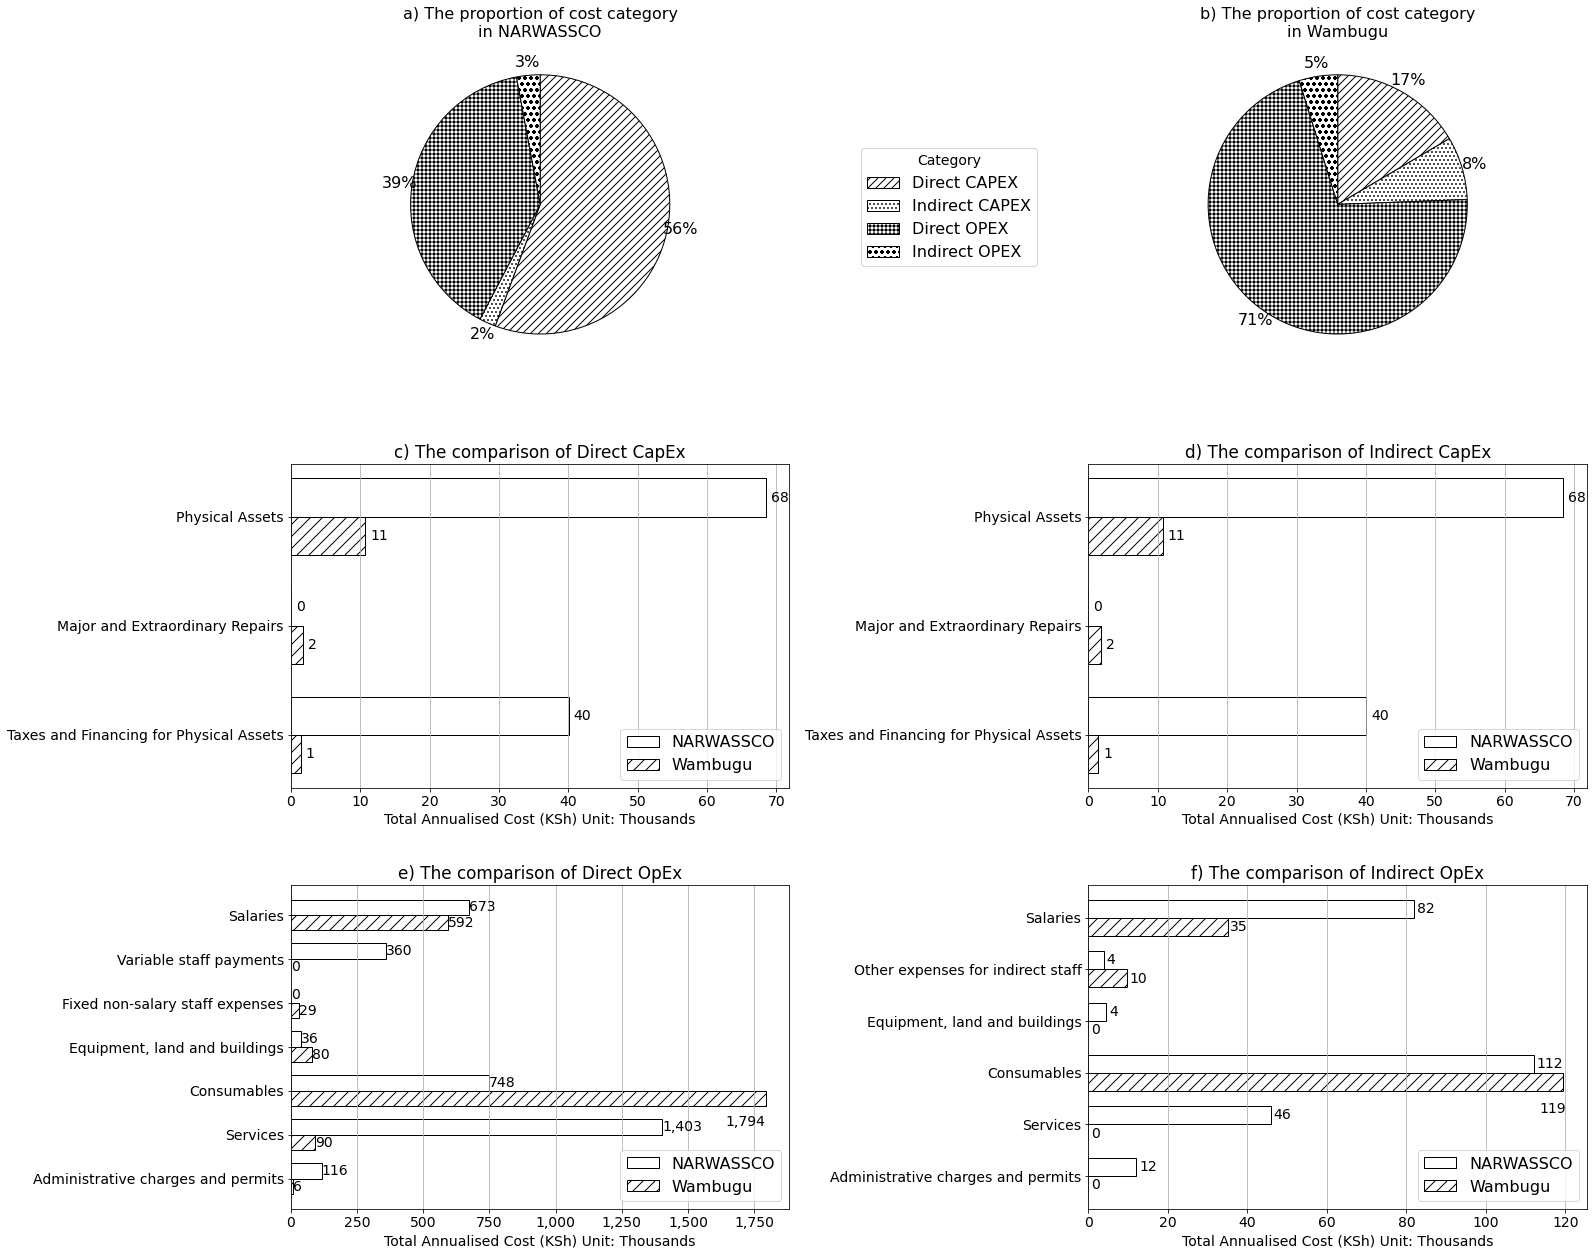

In [252]:
df = pd.read_excel(path_excel, sheet_name=sheetname)

fig = plt.figure(figsize=(20, 18))

ax1 = fig.add_subplot(3, 2, 1)

group_col='Category'

createPiechart(
    ax1,
    title='a) The proportion of cost category\nin NARWASSCO',
    group_col=group_col,
    value_col='NARWASSCO'
)

ax2 = fig.add_subplot(3, 2, 2)

createPiechart(
    ax2,
    title='b) The proportion of cost category\nin Wambugu',
    group_col=group_col,
    value_col='Wambugu'
)

plt.legend(wedges, df[group_col], title=group_col, loc='upper center', bbox_to_anchor=(-0.7, 0.7), prop={"size":16})

ax3 = fig.add_subplot(3, 2, 3)

createComparedBarchart(
    ax3, 
    sheet_name='fsm_E&T_directcapex', 
    x_col_1='NARWASSCO', 
    x_col_2='Wambugu', 
    y_col='Category', 
    title='c) The comparison of Direct CapEx', 
    x_label='Total Annualised Cost (KSh) Unit: Thousands'
)

ax4 = fig.add_subplot(3, 2, 4)

createComparedBarchart(
    ax4, 
    sheet_name='fsm_E&T_directcapex', 
    x_col_1='NARWASSCO', 
    x_col_2='Wambugu', 
    y_col='Category', 
    title='d) The comparison of Indirect CapEx', 
    x_label='Total Annualised Cost (KSh) Unit: Thousands'
)

ax5 = fig.add_subplot(3, 2, 5)

createComparedBarchart(
    ax5, 
    sheet_name='fsm_E&T_directopex', 
    x_col_1='NARWASSCO', 
    x_col_2='Wambugu', 
    y_col='Category', 
    title='e) The comparison of Direct OpEx', 
    x_label='Total Annualised Cost (KSh) Unit: Thousands'
)

ax6 = fig.add_subplot(3, 2, 6)

createComparedBarchart(
    ax6, 
    sheet_name='fsm_E&T_indirectopex', 
    x_col_1='NARWASSCO', 
    x_col_2='Wambugu', 
    y_col='Category', 
    title='f) The comparison of Indirect OpEx', 
    x_label='Total Annualised Cost (KSh) Unit: Thousands'
)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.6, hspace=0.3)

plt.savefig(file_path, format="png", dpi=dpi, transparent=True, bbox_inches='tight')
plt.show()